In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision

In [2]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 500 == 0:
            print(count,"loss:",loss)
        count+=1

    # for i in range(1500):
    #     # Compute the loss
    #     diff_matrix = torch.mm(W, H) - I
    #     diff_vector = diff_matrix[mask]
    #     loss = torch.norm(diff_vector)
        
    #     # Zero the gradients
    #     optimizer.zero_grad()
        
    #     # Backpropagate
    #     loss.backward()
        
    #     # Update the parameters
    #     optimizer.step()

    #     if i % 100 == 0:
    #         print(i,"loss:",loss)
    
    
    return W,H,loss


In [3]:
# Load image
img = torchvision.io.read_image("Lal_Minar.jpeg")
print(img.shape)

torch.Size([3, 600, 900])


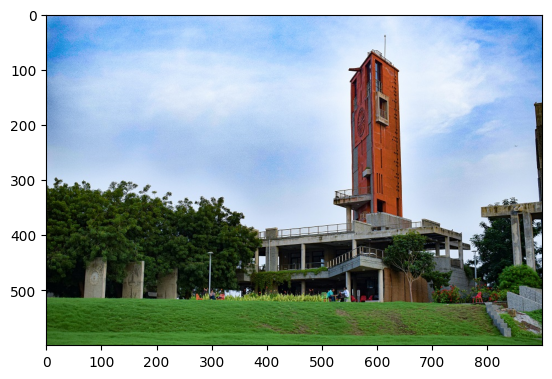

In [4]:
plt.imshow(img.permute(1,2,0))

In [5]:
print(img)

tensor([[[138, 136, 124,  ..., 139, 143, 138],
         [129, 137, 129,  ..., 144, 139, 139],
         [138, 136, 130,  ..., 144, 133, 137],
         ...,
         [ 67,  75,  65,  ...,  59,  55,  47],
         [ 42,  42,  48,  ...,  59,  56,  53],
         [ 52,  58,  66,  ...,  55,  52,  55]],

        [[176, 176, 170,  ..., 170, 174, 169],
         [167, 177, 170,  ..., 175, 170, 170],
         [173, 171, 165,  ..., 175, 164, 168],
         ...,
         [119, 127, 117,  ..., 106, 102,  94],
         [ 93,  93,  99,  ..., 106, 103, 100],
         [103, 109, 117,  ..., 102,  99, 102]],

        [[238, 237, 230,  ..., 237, 241, 236],
         [229, 238, 232,  ..., 242, 237, 237],
         [237, 235, 231,  ..., 240, 229, 233],
         ...,
         [ 44,  52,  42,  ...,  34,  30,  22],
         [ 16,  16,  24,  ...,  36,  33,  30],
         [ 26,  32,  42,  ...,  32,  29,  32]]], dtype=torch.uint8)


tensor([[[0.5412, 0.5333, 0.4863,  ..., 0.5451, 0.5608, 0.5412],
         [0.5059, 0.5373, 0.5059,  ..., 0.5647, 0.5451, 0.5451],
         [0.5412, 0.5333, 0.5098,  ..., 0.5647, 0.5216, 0.5373],
         ...,
         [0.2627, 0.2941, 0.2549,  ..., 0.2314, 0.2157, 0.1843],
         [0.1647, 0.1647, 0.1882,  ..., 0.2314, 0.2196, 0.2078],
         [0.2039, 0.2275, 0.2588,  ..., 0.2157, 0.2039, 0.2157]],

        [[0.6902, 0.6902, 0.6667,  ..., 0.6667, 0.6824, 0.6627],
         [0.6549, 0.6941, 0.6667,  ..., 0.6863, 0.6667, 0.6667],
         [0.6784, 0.6706, 0.6471,  ..., 0.6863, 0.6431, 0.6588],
         ...,
         [0.4667, 0.4980, 0.4588,  ..., 0.4157, 0.4000, 0.3686],
         [0.3647, 0.3647, 0.3882,  ..., 0.4157, 0.4039, 0.3922],
         [0.4039, 0.4275, 0.4588,  ..., 0.4000, 0.3882, 0.4000]],

        [[0.9333, 0.9294, 0.9020,  ..., 0.9294, 0.9451, 0.9255],
         [0.8980, 0.9333, 0.9098,  ..., 0.9490, 0.9294, 0.9294],
         [0.9294, 0.9216, 0.9059,  ..., 0.9412, 0.8980, 0.

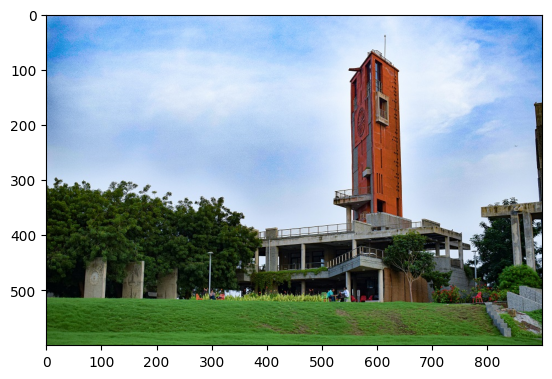

In [6]:
img_normalized = (img - img.min()) / (img.max() - img.min())
print(img_normalized)
plt.imshow(img_normalized.permute(1,2,0))

In [7]:
# mask image with nan values
def mask_image(img, frac):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < frac
    img_copy[mask] = float('nan')
    return img_copy, mask

In [14]:
masked_img = mask_image(img_normalized, 0.2) # changed img to img_normalized
print("Number of nan values:",masked_img[1].sum())

Number of nan values: tensor(323564)


In [15]:
print(masked_img[0])

tensor([[[0.5412, 0.5333, 0.4863,  ..., 0.5451, 0.5608, 0.5412],
         [0.5059, 0.5373, 0.5059,  ..., 0.5647, 0.5451, 0.5451],
         [0.5412,    nan, 0.5098,  ..., 0.5647, 0.5216, 0.5373],
         ...,
         [   nan, 0.2941, 0.2549,  ..., 0.2314, 0.2157,    nan],
         [   nan, 0.1647, 0.1882,  ..., 0.2314, 0.2196, 0.2078],
         [   nan,    nan,    nan,  ..., 0.2157,    nan, 0.2157]],

        [[0.6902,    nan, 0.6667,  ..., 0.6667, 0.6824, 0.6627],
         [0.6549, 0.6941,    nan,  ..., 0.6863,    nan, 0.6667],
         [0.6784, 0.6706,    nan,  ...,    nan,    nan, 0.6588],
         ...,
         [0.4667, 0.4980, 0.4588,  ..., 0.4157, 0.4000, 0.3686],
         [0.3647, 0.3647, 0.3882,  ...,    nan, 0.4039, 0.3922],
         [0.4039, 0.4275, 0.4588,  ...,    nan, 0.3882, 0.4000]],

        [[0.9333, 0.9294,    nan,  ...,    nan, 0.9451, 0.9255],
         [   nan, 0.9333, 0.9098,  ..., 0.9490, 0.9294,    nan],
         [   nan,    nan, 0.9059,  ..., 0.9412, 0.8980, 0.

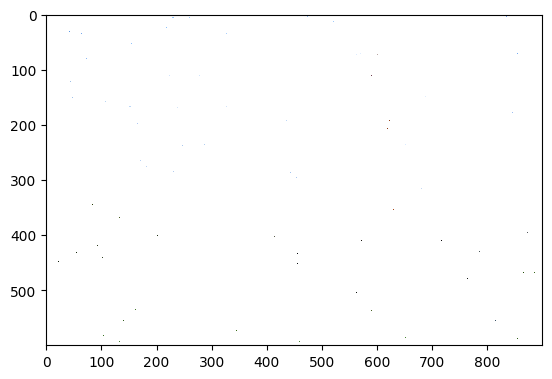

In [16]:
plt.imshow(masked_img[0].permute(1,2,0))

In [17]:
# Image reconstruction using matrix factorization
rank = 75
reconstructed_channels = []

for i in range(3): 
    print("\nMatrix Factorisation for channel_"+str(i)) 
    channel = masked_img[0][i]
    W, H, loss = matrix_factorize(channel, rank)
    reconstructed_channel = torch.mm(W, H)
    reconstructed_channels.append(reconstructed_channel)
    print("final loss for channel_"+str(i),"is:",loss)


Matrix Factorisation for channel_0
0 loss: tensor(5720.4561, grad_fn=<LinalgVectorNormBackward0>)
100 loss: tensor(647.1139, grad_fn=<LinalgVectorNormBackward0>)
200 loss: tensor(64.7268, grad_fn=<LinalgVectorNormBackward0>)
300 loss: tensor(52.6306, grad_fn=<LinalgVectorNormBackward0>)
400 loss: tensor(49.8615, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(48.0411, grad_fn=<LinalgVectorNormBackward0>)
600 loss: tensor(46.4961, grad_fn=<LinalgVectorNormBackward0>)
700 loss: tensor(45.1772, grad_fn=<LinalgVectorNormBackward0>)
800 loss: tensor(44.0049, grad_fn=<LinalgVectorNormBackward0>)
900 loss: tensor(42.9581, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(42.1279, grad_fn=<LinalgVectorNormBackward0>)
1100 loss: tensor(41.2799, grad_fn=<LinalgVectorNormBackward0>)
1200 loss: tensor(40.6312, grad_fn=<LinalgVectorNormBackward0>)
1300 loss: tensor(39.9731, grad_fn=<LinalgVectorNormBackward0>)
1400 loss: tensor(39.3622, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: te

In [18]:
reconstructed_image_factorisation = torch.stack(reconstructed_channels)
print(reconstructed_image_factorisation.shape)

torch.Size([3, 600, 900])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8480473..2.0348897].


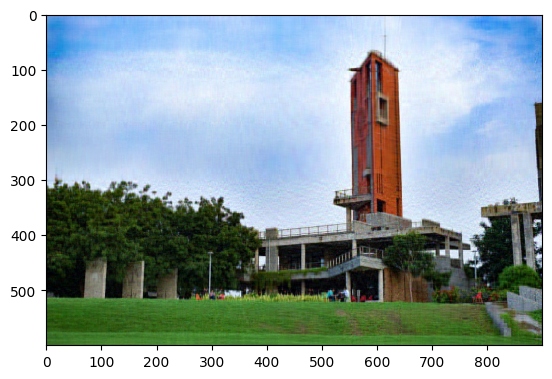

In [19]:
reconstructed_img = reconstructed_image_factorisation.permute(1,2,0).cpu().detach().numpy()
plt.imshow(reconstructed_img)

max pixel value: 2.0348897 and min pixel value: -0.8480473


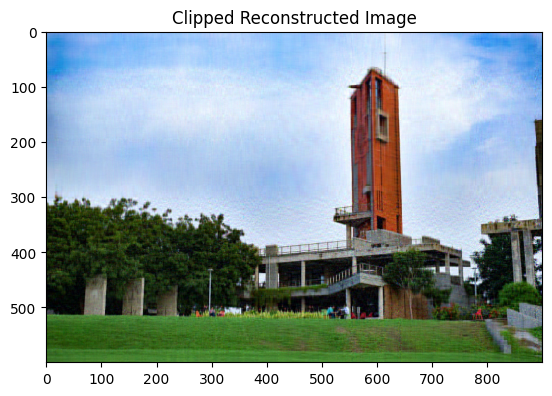

In [21]:
print("max pixel value:",reconstructed_img.max(),"and min pixel value:",reconstructed_img.min())

#Clipped Image
reconstructed_img_clipped = np.clip(reconstructed_img, 0, 1)
plt.title("Clipped Reconstructed Image")
plt.imshow(reconstructed_img_clipped)
plt.show()


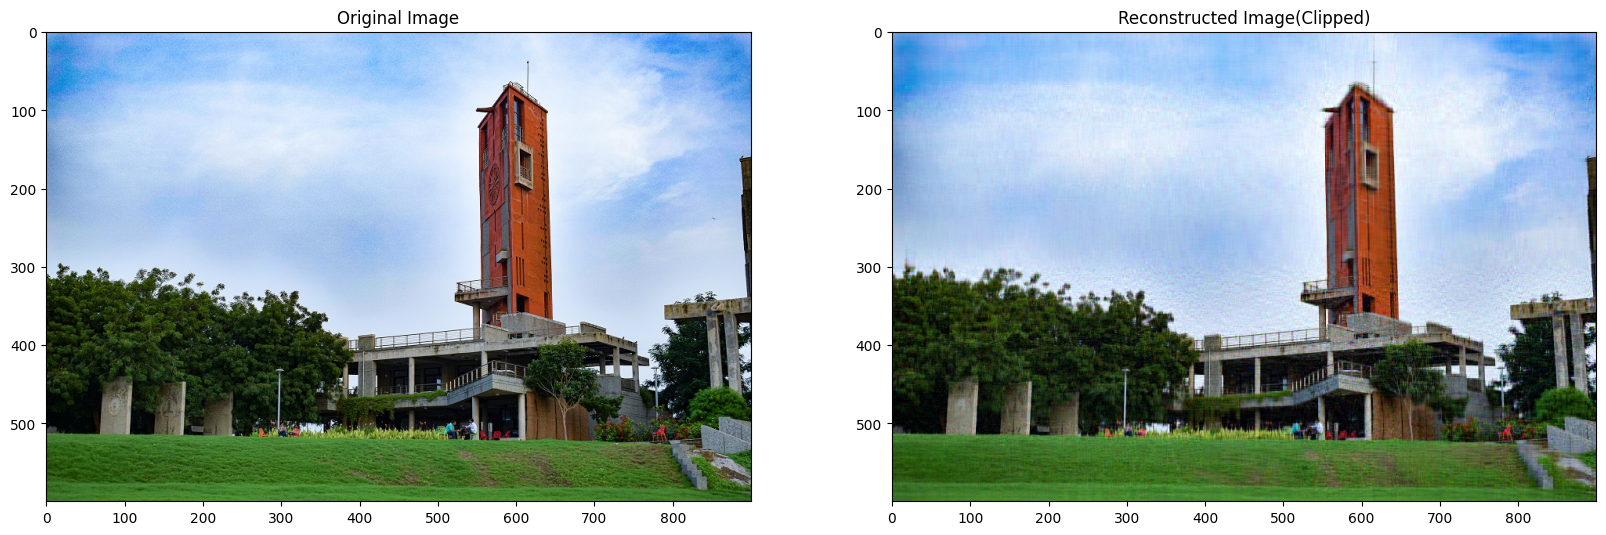

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.imshow(img_normalized.permute(1,2,0))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(reconstructed_img_clipped)
plt.title("Reconstructed Image(Clipped)")

plt.show()

In [23]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(1/rmse_value)
    return psnr

In [25]:
## Calculate RMSE and PSNR on clipped array or standardized array with original array
img_normalized_permuted = img_normalized.permute(1,2,0).cpu().detach().numpy()

print("RMSE for original image and reconstructed image(Clipped):",rmse(img_normalized_permuted,reconstructed_img_clipped))
print("PSNR for original image and reconstructed image(Clipped):",psnr(img_normalized_permuted,reconstructed_img_clipped))

RMSE for original image and reconstructed image(Clipped): 0.04797855
PSNR for original image and reconstructed image(Clipped): 26.379057591525097
